#### Escolha de base de dados

Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

1. Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

2. Quantos países existem no dataset?
    
3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
    
4. Realize o pré-processamento adequado dos dados.


#### Clusterização

Para os dados pré-processados da etapa anterior você irá:

1. Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:

    a) K-Médias

    b) Clusterização Hierárquica

2. Para os resultados, do K-Médias:

    a) Interprete cada um dos clusters obtidos citando:

        i) Qual a distribuição das dimensões em cada grupo;

        ii) O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique.

3. Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados.

4. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

#### Escolha de algoritmos

1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.
Por que o algoritmo de DBScan é mais robusto à presença de outliers?

4. Assim que terminar, salve o seu arquivo PDF e poste no Moodle. Utilize o seu nome para nomear o arquivo, identificando também a disciplina no seguinte formato: “nomedoaluno_nomedadisciplina_pd.PDF”.

#### Escolha de base de dados

Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

1. Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

2. Quantos países existem no dataset?
    
3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
    
4. Realize o pré-processamento adequado dos dados.

In [1]:
import pandas as pd
import numpy as np

In [2]:
file = 'aulas/machine_learning/aprendizado_nao_supervisionado_files/archive/Country-data.csv'
country_data = pd.read_csv(file)
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# 2) Quantos países existem no dataset
country_data.loc[:,'country'].unique().size

167

In [5]:
# 3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. 
# Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

In [6]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [10]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact
import matplotlib.pyplot as plt

# Função para plotar o gráfico
def plot_interactive_boxplot(x_variable, y_variable):
    fig = px.scatter(country_data, x=x_variable, y=y_variable)
    
    fig.show()

# Criar widgets interativos
interact(plot_interactive_boxplot, 
         x_variable=country_data.iloc[:,1:].columns.tolist(), 
         y_variable=country_data.iloc[:,1:].columns.tolist())


interactive(children=(Dropdown(description='x_variable', options=('child_mort', 'exports', 'health', 'imports'…

<function __main__.plot_interactive_boxplot(x_variable, y_variable)>

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Remover a coluna com nomes dos países (assumindo que é a primeira coluna)
df_numerico = country_data.iloc[:,1:]

# Número total de colunas numéricas
num_cols = len(df_numerico.columns)

# Criar uma figura com subplots (3 colunas por linha)
fig = make_subplots(rows=(num_cols // 3) + (num_cols % 3 > 0), cols=3, subplot_titles=df_numerico.columns)

# Adicionar um boxplot para cada coluna numérica
for i, col in enumerate(df_numerico.columns):
    fig.add_trace(go.Box(y=df_numerico[col], name=col), row=(i // 3) + 1, col=(i % 3) + 1)

# Ajustar o layout
# O cálculo da altura é ajustado para acomodar 3 gráficos por linha
fig.update_layout(height=300 * ((num_cols // 3) + (num_cols % 3 > 0)), width=900, showlegend=False)

fig.show()


In [12]:
country_data.loc[country_data['child_mort']>137,['country', 'child_mort']]

,country,child_mort
31,Central African Republic,149.0
32,Chad,150.0
66,Haiti,208.0
132,Sierra Leone,160.0


In [13]:
country_data.loc[country_data['exports']>86.9,['country', 'exports']]

,country,exports
73,Ireland,103.0
91,Luxembourg,175.0
98,Malta,153.0
131,Seychelles,93.8
133,Singapore,200.0


In [14]:
country_data.loc[country_data['health']>13.1,['country', 'health']]

,country,health
101,"Micronesia, Fed. Sts.",14.2
159,United States,17.9


In [15]:
country_data.loc[country_data['imports']>101,['country', 'imports']]

,country,imports
91,Luxembourg,142.0
98,Malta,154.0
131,Seychelles,108.0
133,Singapore,174.0


In [16]:
country_data.loc[country_data['income']>49400,['country', 'income']]

,country,income
23,Brunei,80600
82,Kuwait,75200
91,Luxembourg,91700
114,Norway,62300
123,Qatar,125000
133,Singapore,72100
145,Switzerland,55500
157,United Arab Emirates,57600


In [17]:
country_data.loc[country_data['inflation']>23.6,['country', 'inflation']]

,country,inflation
49,Equatorial Guinea,24.9
103,Mongolia,39.2
113,Nigeria,104.0
149,Timor-Leste,26.5
163,Venezuela,45.9


In [18]:
country_data.loc[country_data['life_expec']<52,['country', 'life_expec']]

,country,life_expec
31,Central African Republic,47.5
66,Haiti,32.1
87,Lesotho,46.5


In [19]:
country_data.loc[country_data['total_fer']>6.59,['country', 'total_fer']]

,country,total_fer
112,Niger,7.49


In [20]:
country_data.loc[country_data['gdpp']>33700,['country', 'gdpp']]

,country,gdpp
7,Australia,51900
8,Austria,46900
15,Belgium,44400
23,Brunei,35300
29,Canada,47400
44,Denmark,58000
53,Finland,46200
54,France,40600
58,Germany,41800
68,Iceland,41900


In [21]:
# 4. Realize o pré-processamento adequado dos dados.

Após analisar as variações, valores máximos, outliers, etc, não consegui identificar nenhuma necessidade de qualquer modificação, adição ou remoção de dados, por tanto a única ação a ser feita, apenas a normalização dos dados 

In [22]:
from sklearn.preprocessing import StandardScaler
dfT = StandardScaler()
dfT = dfT.fit_transform(country_data.iloc[:,1:])

In [23]:
dfT

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

#### Clusterização

Para os dados pré-processados da etapa anterior você irá:

1. Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:

    a) K-Médias

    b) Clusterização Hierárquica

2. Para os resultados, do K-Médias:

    a) Interprete cada um dos clusters obtidos citando:

        i) Qual a distribuição das dimensões em cada grupo;

        ii) O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique.

3. Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados.

4. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

In [24]:
## K-Médias
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans = kmeans.fit_predict(dfT)

c:\Users\berna\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\berna\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 245, in _count_physical_cores
    raise ValueError(
c:\Users\berna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [25]:
kmeans

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [26]:
## Clusterização Hierárquica
from sklearn.cluster import AgglomerativeClustering
n_clusters = 3
agglomerative = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
agglomerative = agglomerative.fit_predict(dfT)

In [27]:
agglomerative

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

2. Para os resultados, do K-Médias:

    a) Interprete cada um dos clusters obtidos citando:

        i) Qual a distribuição das dimensões em cada grupo;

        ii) O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique.

In [28]:
countries = country_data.loc[:,['country']]
countries

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda
...,...
162,Vanuatu
163,Venezuela
164,Vietnam
165,Yemen


In [29]:
countries['class'] = kmeans

In [30]:
kmeans_countries = countries.sort_values('class').reset_index(drop=True)
kmeans_countries

,country,class
0,Georgia,0
1,Kazakhstan,0
2,Jordan,0
3,Japan,0
4,Jamaica,0
...,...,...
162,India,1
163,Zambia,1
164,Malta,2
165,Singapore,2


In [31]:
kmeans_countries.describe()

,class
count,167.000000
mean,0.443114
std,0.533287
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [32]:
kmeans_countries.loc[kmeans_countries['class']==0,:].sort_values('country')['country'].unique()

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bhutan',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Canada',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji',
       'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada',
       'Hungary', 'Iceland', 'Iran', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Latvia',
       'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia',
       'Maldives', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco',
       'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Panama',
       'Paraguay', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'Russia', 'Saudi Arabia', 'Serbia', '

In [33]:
kmeans_countries.loc[kmeans_countries['class']==1,:].sort_values('country')['country'].unique()

array(['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bolivia',
       'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Indonesia', 'Iraq',
       'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Micronesia, Fed. Sts.', 'Mongolia', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines',
       'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Tonga', 'Turkmenistan', 'Uganda', 'Uzbekistan', 'Vanuatu',
       'Yemen', 'Zambia'], dtype=object)

In [34]:
kmeans_countries.loc[kmeans_countries['class']==2,:].sort_values('country')['country'].unique()

array(['Luxembourg', 'Malta', 'Singapore'], dtype=object)

In [35]:
kmeans.astype(int)

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

c:\Users\berna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\berna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



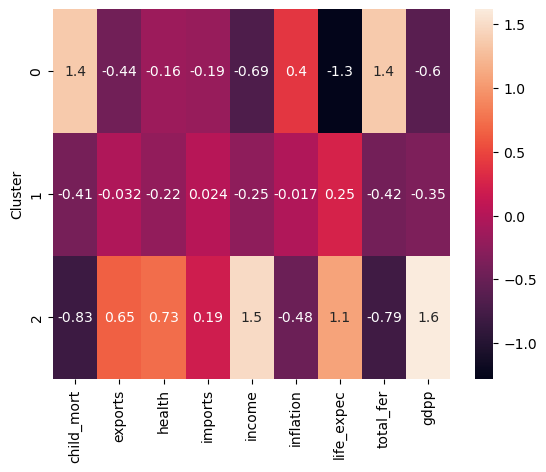

In [36]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

kmeansL = KMeans(n_clusters=3)
labels = kmeansL.fit_predict(dfT)

dfT_dataframe = pd.DataFrame(dfT, columns=country_data.iloc[:,1:].columns)

dfT_dataframe['Cluster'] = labels

cluster_means = dfT_dataframe.groupby('Cluster').mean()

sns.heatmap(cluster_means, annot=True)
plt.show()


Pelo mapa de calor é possível reparar que no cluster '0' apresenta o income bem acima e o gdpp (que representa o pib), bem acima do que o normal, o que indica que se trata de países desenvolvidos, é possível notar também uma expectativa de vida acima da média e uma mortalidade infantil bem abaixo da média, ajudando a chegar na conclusão

No cluster '1' O indice de mortalidade infantil é muito alto mostrando que devem ser países subdesenvolvidos, isso se sustenta quando se observa a baixa espectativa de vida e o baixo income

Já no cluster '2' apresenta indiceis bem próximos a média, geralmente tendendo ao lado "positivo", como por exemplo uma mortalidade infantil abaixo da média e uma expectativa de vida um pouco acima da média, logo podendo se concluir que esses são os países em desenvolvimento

Logo o país que melhor representa o Brasil seriam os países em desenvolvimentos, logo o cluster 2

3. Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados.

In [37]:
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import linkage

# Supondo que dfT é o seu array de dados normalizados
# Calculando a matriz de linkage
linked = linkage(dfT, method='ward')

# Criando o dendrograma com Plotly
fig = ff.create_dendrogram(linked, orientation='bottom', labels=range(1, len(dfT)))
fig.update_layout(width=800, height=500)
fig.show()


c:\Users\berna\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [38]:
countries['agg_cluster'] = agglomerative

In [39]:
countries.loc[countries['agg_cluster']==0].sort_values('country')['country'].unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Libya',
       'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Oman', 'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore', 'Spain',
       'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

In [40]:
countries.loc[countries['agg_cluster']==1].sort_values('country')['country'].unique()

array(['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde',
       'Chile', 'China', 'Colombia', 'Congo, Rep.', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Fiji', 'Gabon', 'Georgia', 'Ghana', 'Grenada',
       'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kiribati',
       'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon', 'Lesotho',
       'Liberia', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives',
       'Mauritania', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova',
       'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Namibia', 'Nepal',
       'Nigeria', 'Pakis

In [41]:
countries.loc[countries['agg_cluster']==2].sort_values('country')['country'].unique()

array(['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       "Cote d'Ivoire", 'Gambia', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Kenya', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Niger',
       'Rwanda', 'Senegal', 'Sierra Leone', 'Tanzania', 'Togo', 'Uganda',
       'Zambia'], dtype=object)

In [42]:
countries.loc[:,['country','agg_cluster']].groupby('agg_cluster').count()

,country
agg_cluster,
0,34
1,106
2,27


In [43]:
country_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Sabendo que os no eixo X estão o index de cada país de acordo com o dataset original, podemos identificar no dendograma que os países da esquerda representam os países subdesenvolvidos, como classificados no k-means, os do meio são os em desenvolvimentos, são mais fáceis de identificar por apresentar uma quantidade de países superior as outras e os da direita representam os países desenvolvidos

É possível verificar no dendograma a existência desses 3 grandes grupos, sendo que os países desenvolvidos e em desenvolvidos apresentam características mais similares quando comparados com os países subdesenvolvidos, de acordo com a classificação obtida através da Clusterização Hierárquica

4. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

In [44]:
# Países desenvolvidos pelo K-means
dev_kmeans = kmeans_countries.loc[kmeans_countries['class']==1,:].sort_values('country')['country'].unique()
dev_kmeans

array(['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bolivia',
       'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Indonesia', 'Iraq',
       'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Micronesia, Fed. Sts.', 'Mongolia', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines',
       'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Tonga', 'Turkmenistan', 'Uganda', 'Uzbekistan', 'Vanuatu',
       'Yemen', 'Zambia'], dtype=object)

In [45]:
# Países desenvolvidos pela Aglomeração Hierarquica
dev_agg = countries.loc[countries['agg_cluster']==0].sort_values('country')['country'].unique()
dev_agg

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Libya',
       'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Oman', 'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore', 'Spain',
       'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

In [46]:
print(len(dev_kmeans))
print(len(dev_agg))

68
34


In [47]:
np.intersect1d(dev_kmeans, dev_agg)

array([], dtype=object)

In [48]:
print(len(np.intersect1d(dev_kmeans, dev_agg)))

0


É possível verificar que com k-means por exemplo ele classificou 36 países como desenvolvidos e com a clusterização hierárquica classificaram 36, sendo que existem 31 países que estão nos dois grupos

A seguir estão os países que estão em um, porém não estão no outro

In [49]:
difference_set1_set2 = np.setdiff1d(dev_kmeans, dev_agg)
difference_set2_set1 = np.setdiff1d(dev_agg, dev_kmeans)

print("Elementos em k-means que não estão em clusterização hierárquica:", difference_set1_set2)
print("Elementos em clusterização hierárquica que não estão em k-means:", difference_set2_set1)

Elementos em k-means que não estão em clusterização hierárquica: ['Afghanistan' 'Angola' 'Bangladesh' 'Benin' 'Bolivia' 'Botswana'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Central African Republic'
 'Chad' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' "Cote d'Ivoire" 'Egypt'
 'Equatorial Guinea' 'Eritrea' 'Gabon' 'Gambia' 'Ghana' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'India' 'Indonesia' 'Iraq'
 'Kenya' 'Kiribati' 'Kyrgyz Republic' 'Lao' 'Lesotho' 'Liberia'
 'Madagascar' 'Malawi' 'Mali' 'Mauritania' 'Micronesia, Fed. Sts.'
 'Mongolia' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Niger' 'Nigeria'
 'Pakistan' 'Philippines' 'Rwanda' 'Samoa' 'Senegal' 'Sierra Leone'
 'Solomon Islands' 'South Africa' 'Sudan' 'Tajikistan' 'Tanzania'
 'Timor-Leste' 'Togo' 'Tonga' 'Turkmenistan' 'Uganda' 'Uzbekistan'
 'Vanuatu' 'Yemen' 'Zambia']
Elementos em clusterização hierárquica que não estão em k-means: ['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brunei' 'Canada' 'Denmark'
 'Finland' 'F

É possível identificar algumas divergências também para países subdesenvolvidos e em desenvolvimentos

Consegui extrair informações diferentes de cada um, por exemplo com com a classificação hierárquica consigo verificar que os países em desenvolvimentos tem mais similaridades com os desenvolvidos do que com os em subdesenvolvidos, o que poderia ser um insight bem importante dependendo do que se deseja alcançar

#### Escolha de algoritmos

1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.
Por que o algoritmo de DBScan é mais robusto à presença de outliers?

1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

Primeiramente, são escolhidos aleatóriamente k centroides iniciais, onde k representa o número especificado de clusters especificado para o modelo

Depois de escolhidos esses centroides, todos os outros pontos mais próximos de cada centroide farão parte do respectivo cluster mais próximo a ele.

Então, esses centroides são ajustados para que sejam realmente o centroides de cada respectivo cluster, logo os pontos que estão mais próximos de cada centroide são reajustados novamente

Esse processo se repete até que todos os centroides fiquem estáticos e não se consigam se movimentar mais, parte do processo que chamamos de convergência

2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.

    Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

In [51]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3, metric='euclidean', method='alternate', init='heuristic')
kmedoids.fit(dfT)
medoids = kmedoids.cluster_centers_
labels = kmedoids.labels_


In [52]:
labels

array([1, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1,
       2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 0,
       1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2,
       0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1], dtype=int64)

Utilisando o KMedoids ele obterá os pontos na hora da interaçã sempre sendo dados reais do data set

3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.
Por que o algoritmo de DBScan é mais robusto à presença de outliers?

O algoritmo do K-means ele é mais sensível aos outliers pelo fato de que todos os seuspontos tem que estar enquadrados dentro de um cluster, sendo ele um da muito distante de um grupo ou não (tendo características similares ao grupo ou não), já no DBScan isso não acontece já que se define um raio máximo que um ponto tem que estar em promiximidade a outro ponto que faça parte de um cluster. Por tanto, geralmente os outliers no DBScan geralmente são classificados como ruídos apenas.